In [1]:
#Standard import for all projects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Three ways to evaluate SkLearn models/estimators:
* 1. Estimator's built-in 'score()' method
* 2. The 'scoring' parameter
* 3. Problem-specific metric functions

## 1. Evaluating a model with the score method

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data (training the ML model)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier()

In [4]:
# Evaluate the model RFC (use the patterns the model learned to make predictions)
# The highest value for the .score() method is 1.0, the lowest in 0.0
clf.score(X_train, y_train)

1.0

In [5]:
clf.score(X_test, y_test)

0.8524590163934426

### score() on regression problem

In [6]:
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestClassifier(n_estimators=100) # n_estimators : you can tweak this hyperparam to try to improve

# Fit the model to the data (training the ML model)
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
model.score(X_test, y_test)

0.8524590163934426

## 2. Evaluating using the 'scoring' parameter 

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier()
clf.fit(X_train, y_train);



In [9]:
clf.score(X_test, y_test)

0.8524590163934426

In [10]:
cross_val_score(clf, X, y, cv=10) # 'cv' you can change this param to improve results

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [11]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [12]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [13]:
# Scoring parameter is set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics:

1. Accuracy;
2. Area under ROC curve;
3. Confusion matrix
4. Classification report.


## Accuracy

In [14]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [16]:
np.mean(cross_val_score)

0.8248087431693989

In [17]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


## Area under reciver operating characteristic curve(AUC or ROC)
* Area under curve(AUC)
* ROC curve

Roc curves are a comparison of a model's true rate (TPR)  versus a moodel's false postitive rate (FPR)

* True positive = model predicts 1 when truth is 1;
* False positive = model predicts 1 when truth is 0;
* True negative = models predicts 0 when trusth is 0;
* False negative = model predicts 0 when truth is 1.

In [18]:
# Create X_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.metrics import roc_curve
# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# keep y_probs
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [20]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [21]:
# Calculate FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

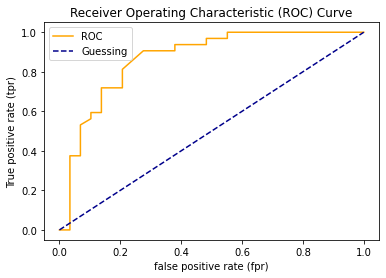

In [22]:
# Create a function for plotting ROC curve

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
    
    

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

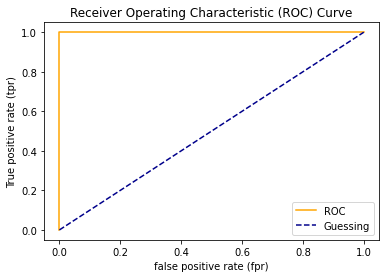

In [24]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [25]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

Reading Extension: ROC Curve + AUC

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

    ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

    The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

    The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

    ROC and AUC, Clearly Explained! by StatQuest

    ROC documentation in Scikit-Learn (contains code examples)

    How the ROC curve and AUC are calculated by Google's Machine Learning team

## Confusion Matrix

A confusion matrix ia a quick way to compare the labels a model predicts and the
actual labels it was supposed to predict. In essence, giving you an idea of 
there the model is getting confused.

In [28]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [33]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual Label,,
0,23,6
1,6,26
